In [1]:
# 1

In [2]:
import pandas as pd

In [5]:
data = pd.read_csv("churn_analysis.csv", index_col=0)
data.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [28]:
data["churn"] = data["churn"].replace({"False.": False, "True.": True})
data.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False


In [29]:
control = data[data.treatment == 1]

In [30]:
import itertools
from scipy import stats

In [45]:
rez = 0
for state1, state2 in itertools.combinations(control.state.unique(), 2):
    state1 = control[control.state == state1].churn.value_counts()
    state2 = control[control.state == state2].churn.value_counts()
    table = pd.concat([state1, state2], axis=1, sort=True)
    table = table.fillna(0)
    rez += stats.chi2_contingency(table, correction=False)[1] < 0.05
rez

34

In [38]:
# 2

In [78]:
all_states = control[["state", "churn"]].groupby("state").agg(["count", "sum"])
all_states.columns = ["count", "sum"]
all_states["count"] = all_states["count"] - all_states["sum"]
stats.chi2_contingency(all_states, correction=False)

(44.05271236692548, 0.7097590042778473, 50, array([[16.7183227 ,  3.2816773 ],
        [25.07748405,  4.92251595],
        [13.37465816,  2.62534184],
        [15.88240656,  3.11759344],
        [12.53874202,  2.46125798],
        [18.39015497,  3.60984503],
        [25.07748405,  4.92251595],
        [15.88240656,  3.11759344],
        [14.21057429,  2.78942571],
        [16.7183227 ,  3.2816773 ],
        [17.55423883,  3.44576117],
        [10.86690975,  2.13309025],
        [12.53874202,  2.46125798],
        [15.04649043,  2.95350957],
        [10.03099362,  1.96900638],
        [19.2260711 ,  3.7739289 ],
        [20.89790337,  4.10209663],
        [20.89790337,  4.10209663],
        [12.53874202,  2.46125798],
        [20.06198724,  3.93801276],
        [20.06198724,  3.93801276],
        [23.40565178,  4.59434822],
        [18.39015497,  3.60984503],
        [17.55423883,  3.44576117],
        [17.55423883,  3.44576117],
        [20.06198724,  3.93801276],
        [21.73381951,

In [39]:
# 3

In [52]:
rez = 0
for state1, state2 in itertools.combinations(control.state.unique(), 2):
    state1 = control[control.state == state1].churn.value_counts()
    state2 = control[control.state == state2].churn.value_counts()
    table = pd.concat([state1, state2], axis=1, sort=True)
    table = table.fillna(0)
    rez += stats.chi2_contingency(table, correction=True)[1] < 0.05
rez

0

In [42]:
# 4

In [51]:
rez = 0
for state1, state2 in itertools.combinations(control.state.unique(), 2):
    state1 = control[control.state == state1].churn.value_counts()
    state2 = control[control.state == state2].churn.value_counts()
    table = pd.concat([state1, state2], axis=1, sort=True)
    table = table.fillna(0)
    rez += stats.fisher_exact(table)[1] < 0.05
rez

10

In [53]:
# 5

In [56]:
stats.pearsonr(data.day_calls, data.mes_estim)

(-0.05179435058757264, 0.0027798836869738384)

In [57]:
# 6

In [58]:
stats.spearmanr(data.day_calls, data.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

In [59]:
# 7

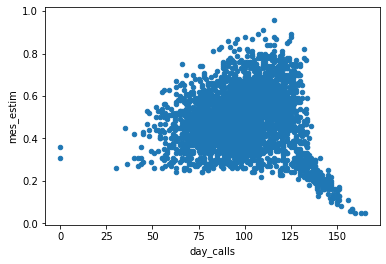

In [63]:
data.plot.scatter("day_calls", "mes_estim")

In [64]:
# 8 ???

In [80]:
chi2, pvalue, *_ = stats.chi2_contingency(all_states, correction=False)
chi2, pvalue

(44.05271236692548, 0.7097590042778473)

In [71]:
(chi2 / all_states.sum().sum() / (min(all_states.shape) - 1)) ** 0.5

0.2003932150203332

In [73]:
# 9

In [76]:
stats.ttest_ind(data[data.treatment == 1].churn, data[data.treatment == 0].churn)

Ttest_indResult(statistic=1.2045205230813099, pvalue=0.2285163910842895)

In [77]:
stats.ttest_ind(data[data.treatment == 1].churn, data[data.treatment == 2].churn)

Ttest_indResult(statistic=2.601870748565941, pvalue=0.009333926332475618)

In [84]:
stats.ttest_ind(data[data.treatment == 0].churn, data[data.treatment == 2].churn)

Ttest_indResult(statistic=1.4172019054376395, pvalue=0.15656334748097409)

In [81]:
data[data.treatment == 0].churn.mean()

0.14563106796116504

In [82]:
data[data.treatment == 1].churn.mean()

0.1640838650865998

In [83]:
data[data.treatment == 2].churn.mean()

0.12511332728921123